In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6074,6075,15802570,Dyer,811,France,Female,45,5,0.00,2,1,1,146123.19,0
2507,2508,15628007,Genovese,653,France,Male,33,1,0.00,2,0,0,53379.52,0
9805,9806,15704597,Trumbull,644,France,Male,33,7,174571.36,1,0,1,43943.09,0
4529,4530,15570087,Parry-Okeden,664,France,Female,44,8,142989.69,1,1,1,115452.51,1
6265,6266,15624471,Chikwado,850,France,Male,37,6,0.00,2,1,0,109291.22,0


In [57]:
df.drop(['CustomerId', 'RowNumber'], axis = 'columns', inplace = True)

In [58]:
df.drop(['Surname'], axis = 'columns', inplace = True)

In [59]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [60]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [61]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [62]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [63]:
df.shape

(10000, 11)

In [64]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [65]:
df2 = pd.get_dummies(data = df, columns = ['Geography', 'Gender'])
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [66]:
df2.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5179,760,34,6,121303.77,2,1,1,59325.21,0,False,True,False,False,True
4666,850,39,5,114491.82,1,1,0,99689.48,0,False,True,False,True,False


In [67]:
cols_to_scale = [ 'CreditScore','Tenure', 'Age', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [68]:
# scaler = MinMaxScaler()
# df2['CreditScore'] = scaler.fit_transform(df2['CreditScore'])
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [84]:
df2.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
Gender_Female           bool
Gender_Male             bool
dtype: object

In [86]:
X = df2.drop('Exited', axis = 'columns')
y = df2['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [88]:
X_train.shape

(8000, 13)

In [90]:
X_test.shape

(2000, 13)

In [96]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(13, input_shape = (13,), activation = 'relu'),
    keras.layers.Dense(8, activation = 'softmax'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)
                


Epoch 1/100


C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.7941 - loss: 0.5829
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.7936 - loss: 0.5092
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7988 - loss: 0.4796
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.7959 - loss: 0.4634
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7979 - loss: 0.4480
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8047 - loss: 0.4353
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8227 - loss: 0.4203
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8252 - loss: 0.4059
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8189 - loss: 0.4054
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8260 - loss: 0.4001
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8281 - loss: 0.3877
Epoch 12/100
250/250 ━━━━━━━━━━

In [98]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8735 - loss: 0.3296


[0.3375917971134186, 0.8640000224113464]

In [100]:
model.evaluate(X_train, y_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8618 - loss: 0.3363


[0.32797232270240784, 0.8654999732971191]

In [102]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.15711467],
       [0.02416799],
       [0.70452726],
       [0.24563786],
       [0.03007384]], dtype=float32)

In [104]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [106]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [108]:
y_test[:5]

5876    0
6555    0
1448    1
3351    0
231     0
Name: Exited, dtype: int64

In [112]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1605
           1       0.75      0.46      0.57       395

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

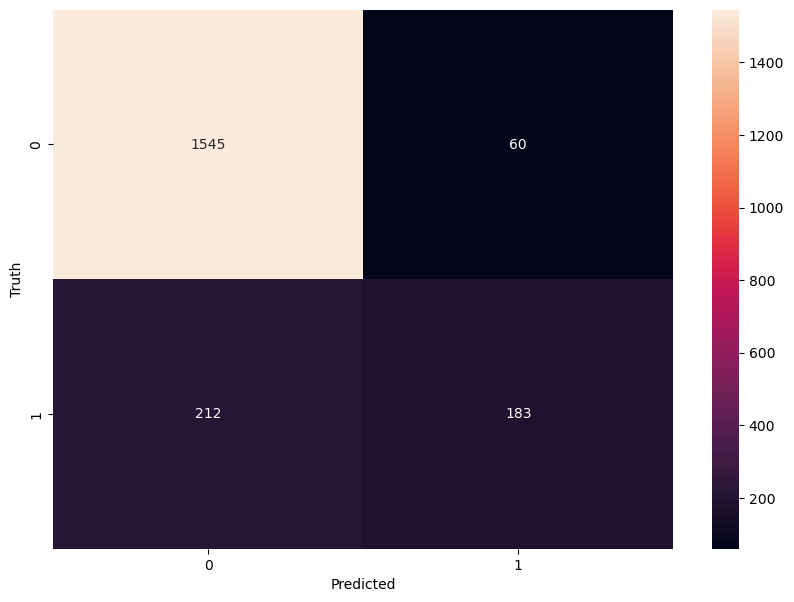

In [114]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')